In [1]:
# Imports necesarios.
import numpy as np
import matplotlib.pyplot as plt
import linreg as l
import quad as q

In [2]:
# Abriendo el csv.
data = np.genfromtxt('framingham.csv', delimiter=',')

# Quitando la fila de los nan.
data = data[1:, :]

# Imprimiendo los datos.
print(data)

[[  1.  39.   4. ...  80.  77.   0.]
 [  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 ...
 [  0.  48.   2. ...  84.  86.   0.]
 [  0.  44.   1. ...  86.  nan   0.]
 [  0.  52.   2. ...  80. 107.   0.]]


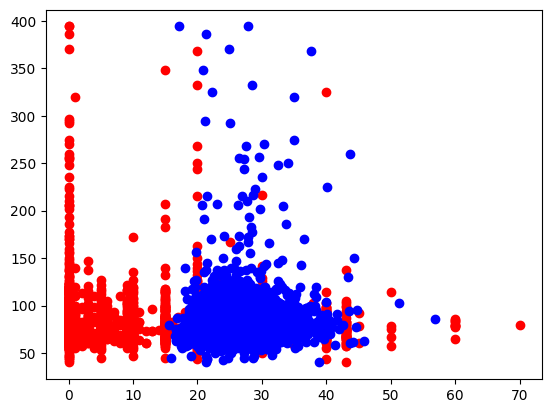

In [3]:
# Variable dependiente: sufre o no un paro cardíaco. (Posición 13). Variable independiente: BMI. (Posición 12)
# Manipulando los datos.

# Fuma o no.
X = data[:,4]

# sufrió o no un paro cardíaco.
y = data[:,14]

# Heartrate.
x = data[:,12]

# Graficando si fuma vs si tuvo algún problema cardiovascular.
plt.scatter(X, y, color="red")
plt.scatter(x, y, color="blue")
plt.show()

t:  [[0.70619331]
 [0.02508694]]
t:  [[0.7063414 ]
 [0.02640745]]
t:  [[0.70648946]
 [0.02772737]]
t:  [[0.7066375]
 [0.0290467]]
t:  [[0.70678552]
 [0.03036544]]
t:  [[0.70693351]
 [0.03168358]]
t:  [[0.70708147]
 [0.03300114]]
t:  [[0.70722942]
 [0.0343181 ]]
t:  [[0.70737733]
 [0.03563448]]
t:  [[0.70752523]
 [0.03695026]]
t:  [[0.7076731 ]
 [0.03826545]]
t:  [[0.70782095]
 [0.03958006]]
t:  [[0.70796877]
 [0.04089407]]
t:  [[0.70811657]
 [0.0422075 ]]
t:  [[0.70826434]
 [0.04352033]]
t:  [[0.70841209]
 [0.04483258]]
t:  [[0.70855982]
 [0.04614424]]
t:  [[0.70870752]
 [0.04745532]]
t:  [[0.7088552]
 [0.0487658]]
t:  [[0.70900286]
 [0.0500757 ]]
t:  [[0.70915049]
 [0.05138501]]
t:  [[0.7092981 ]
 [0.05269373]]
t:  [[0.70944568]
 [0.05400187]]
t:  [[0.70959324]
 [0.05530942]]
t:  [[0.70974078]
 [0.05661638]]
t:  [[0.70988829]
 [0.05792276]]
t:  [[0.71003578]
 [0.05922855]]
t:  [[0.71018324]
 [0.06053376]]
t:  [[0.71033068]
 [0.06183838]]
t:  [[0.7104781 ]
 [0.06314242]]
t:  [[0.710625

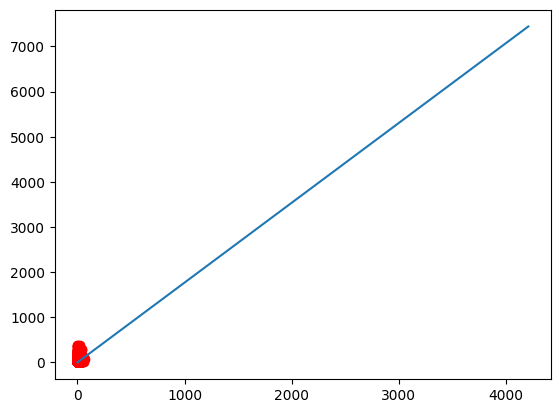

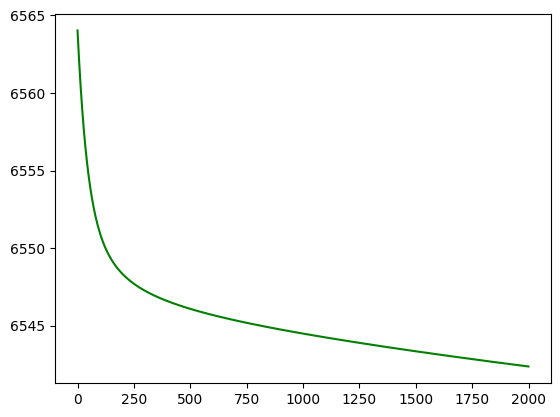

In [4]:
# Variable dependiente: sufre o no un paro cardíaco. (Posición 13). Variable independiente: BMI. (Posición 12)
# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

# print("X: ", X)
# print("X: ", len(X))
# print("y: ", y)
# print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.000001,
    n=2000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()